### Imaging of galaxies

- conda install astropy

- Astronomical images come in FITS format

https://en.wikipedia.org/wiki/FITS

- Let's download an image from: https://www2.mpia-hd.mpg.de/THINGS/Data.html

In [1]:
from astropy.io import fits # IO=Input/Output

To open a FITS file, you can use fits.open()



In [2]:
hdul = fits.open('NGC_3184_NA_MOM0_THINGS.FITS')

In [3]:
print(type(hdul))

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [4]:
header = hdul[0].header

#print(header)

In [5]:
data = hdul[0].data

In [6]:
print(data)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]


In [7]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(1, 1, 1024, 1024)


In [8]:
new_data = data[0,0,:,:] #Slicing

print(new_data.shape)

(1024, 1024)


In [9]:
import matplotlib.pyplot as plt

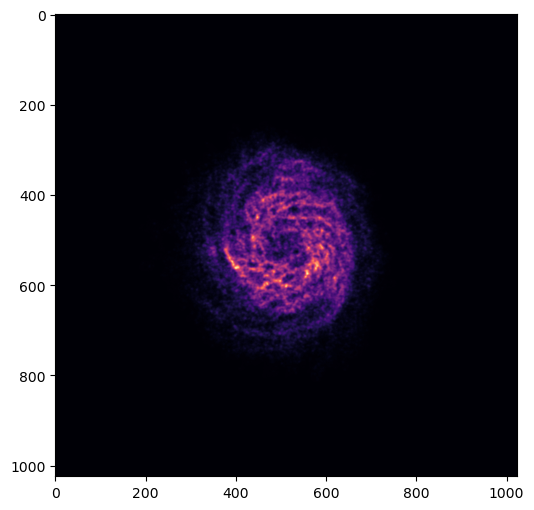

In [10]:
# Figure enviroment

fig, ax = plt.subplots(figsize=(10,6))

ax.imshow(new_data, cmap = 'magma')

plt.show()

### Exercise: Calculating the diameter of this galaxy

### 1. Pixel histogram

In [11]:
print(new_data.size) #(1024x1024)

1048576


In [12]:
new_data1D = new_data.reshape((new_data.size,1))

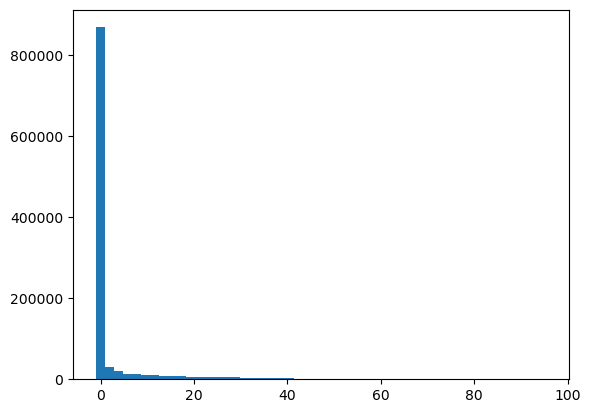

In [13]:
plt.hist(new_data1D, bins = 50)
plt.show()

In [14]:
import numpy as np

In [15]:
print(np.min(new_data1D)) # negative numbers generally imply noise is present
print(np.max(new_data1D))

-1.0854306
95.46323


In [16]:
new_data2D = np.where(new_data < 10, np.nan, new_data)

In [17]:
print(new_data2D.shape)

(1024, 1024)


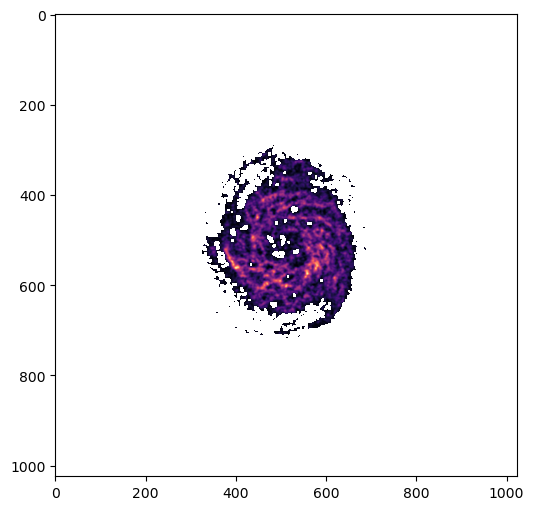

In [18]:
# Figure enviroment

fig, ax = plt.subplots(figsize=(10,6))

ax.imshow(new_data2D, cmap = 'magma')

plt.show()

In [19]:
new_data1D = new_data2D.reshape((new_data.size,1))

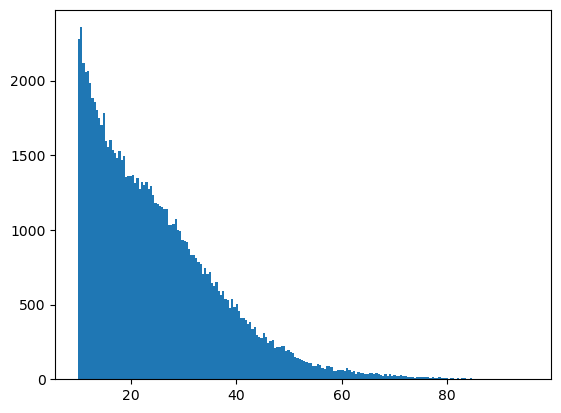

In [20]:
plt.hist(new_data1D, bins = 200)
plt.show()

## Binary image

In [21]:
new_data_bin = np.where(new_data2D > 0, 1., 0.)

In [22]:
print(new_data_bin.shape)

print(np.unique(new_data_bin))

(1024, 1024)
[0. 1.]


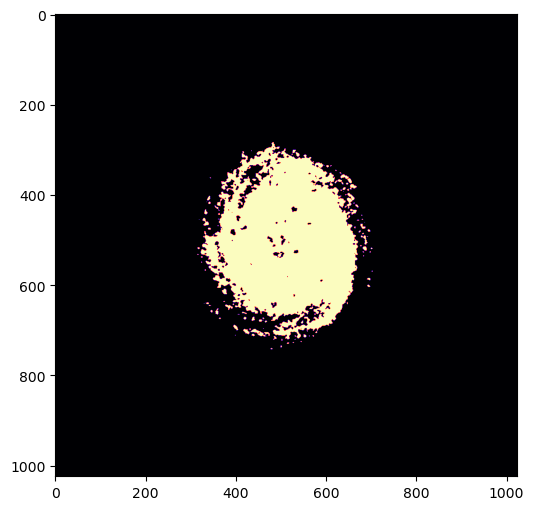

In [23]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(new_data_bin, cmap = 'magma')
plt.show()

### Getting indices

In [24]:
indices = np.where(new_data_bin == 1)

print(indices)

(array([284, 284, 284, ..., 742, 742, 742]), array([482, 483, 484, ..., 479, 480, 481]))


In [25]:
min_x = np.min(indices[1])
max_x = np.max(indices[1])

In [26]:
min_y = np.min(indices[0])
max_y = np.max(indices[0])

In [27]:
print(max_x, min_x)

print(max_y, min_y)

703 315
742 284


### Calculating the radius

In [28]:
radius2 = np.mean([(max_x - min_x), (max_y - min_y)])/2

diameter2 = 2*radius2
print(radius2, diameter2)

211.5 423.0


### Now in astrophysical units (pc, kpc, Mpc)

https://en.wikipedia.org/wiki/Parsec


In [29]:
pixel_resolution = 4.166666768E-04 # in deg.

distance_galaxy = 12.1e3 # in kpc

In [30]:
diameter_galaxy = distance_galaxy*diameter2*np.tan(7.27220539348503054e-6)

print("Diameter of galaxy in kpc is", diameter_galaxy)

Diameter of galaxy in kpc is 37.221328866130584


Data base:

https://ned.ipac.caltech.edu/

## Calculating the centroid

In [31]:
from skimage import filters
from skimage.measure import regionprops

### Centre of mass:

In [32]:
threshold_value = filters.threshold_otsu(new_data)

print(threshold_value)

labeled_foreground = (new_data > threshold_value).astype(int)

print(labeled_foreground)

properties = regionprops(labeled_foreground, new_data)

print(properties[0].area)

14.1888685
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
75809


Documentation: https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

In [33]:
centre_of_mass = properties[0].centroid

print(centre_of_mass)

(507.307047975834, 516.493727657666)


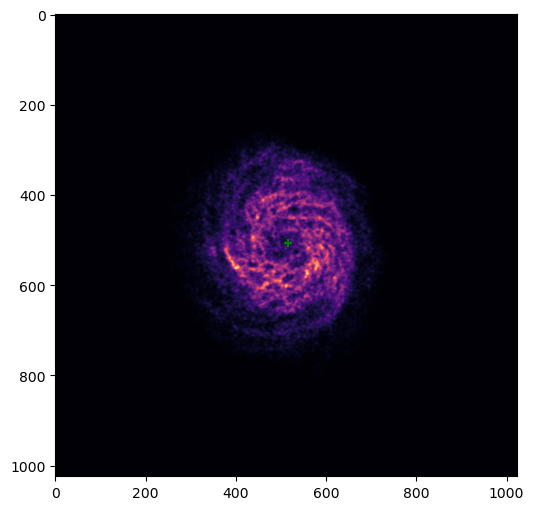

In [34]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(new_data, cmap = 'magma')
ax.scatter(centre_of_mass[1], centre_of_mass[0], marker='+', color='green')
plt.show()

In [35]:
theta = np.linspace(0, 2*np.pi, 180)

In [36]:
a = radius2 * np.cos(theta) + centre_of_mass[1]
b = radius2 * np.sin(theta) + centre_of_mass[0]

#print(b)

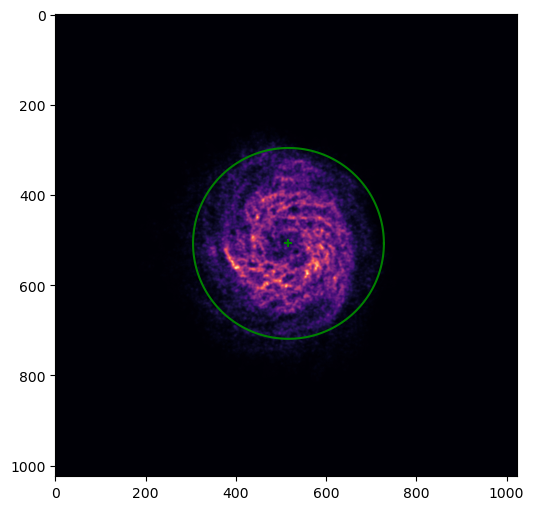

In [37]:
# Fig enviroment

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(new_data, cmap = 'magma')
ax.scatter(centre_of_mass[1], centre_of_mass[0], marker='+', color='green')
ax.plot(a, b, color= 'green')
plt.show()

## Slicing data


In [38]:
slice_x = new_data[int(centre_of_mass[1]),:]

print(slice_x.shape)

(1024,)


In [39]:
x_values = np.arange(new_data.shape[1])

print(x_values)

[   0    1    2 ... 1021 1022 1023]


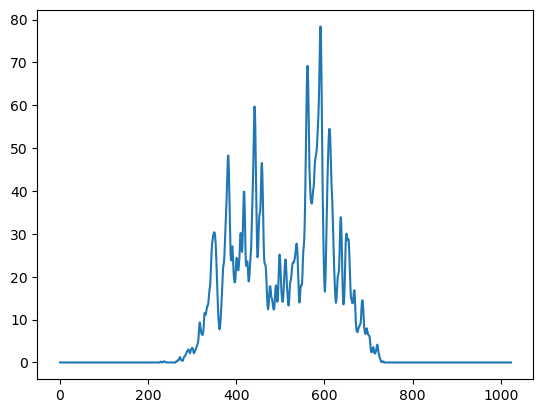

In [40]:
%matplotlib inline

plt.plot(x_values, slice_x)

In [41]:
from scipy.optimize import curve_fit

In [42]:
#define a function to fit to the data
def func(x, a, b):
    return a * np.exp(-b*(x - centre_of_mass[1])**2)

In [43]:
coef, cova = curve_fit(func, x_values, slice_x)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
print(coef)


[3.40113297e+01 3.19107237e-05]


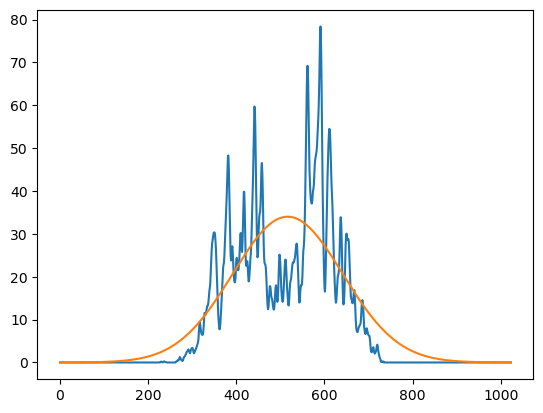

In [45]:
plt.plot(x_values, slice_x)
plt.plot(coef[0] * np.exp(-coef[1]*(x_values - centre_of_mass[1])**2))

In [46]:
sigma = np.sqrt(1/(2*coef[1]))

diameter3 = sigma*2

In [47]:
diameter_galaxy = distance_galaxy*diameter3*np.tan(7.27220539348503054e-6)

print("Diameter of the galaxy in kpc: (lower limit)", diameter_galaxy)

Diameter of the galaxy in kpc: (lower limit) 22.02917218395681
